In [1]:
##Import libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection 

In [2]:
titanic_dataset=pd.read_csv('titanic_train.csv')
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dataset.shape

(891, 12)

In [4]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_dataset.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [7]:
total = titanic_dataset.isnull().sum().sort_values(ascending=False)

In [8]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
class_sex_grouping = titanic_dataset.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

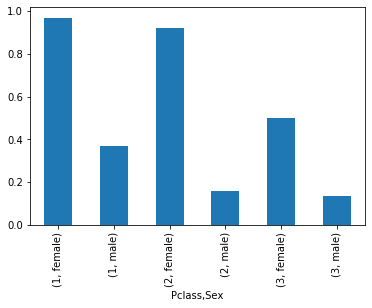

In [10]:
class_sex_grouping['Survived'].plot.bar()
#Female have survived more 

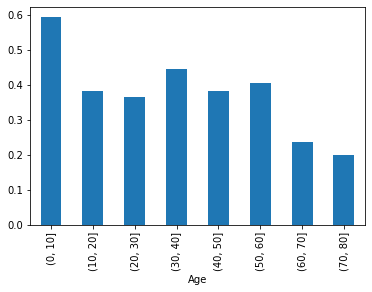

In [11]:
group_by_age = pd.cut(titanic_dataset["Age"], np.arange(0, 90, 10))   #10years gap
age_grouping = titanic_dataset.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [12]:
titanic_dataset = titanic_dataset.drop(['Name','Ticket','Cabin'], axis=1)

In [13]:
titanic_dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [14]:
titanic_dataset.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
titanic_dataset['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
from sklearn import preprocessing
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df['Sex'] = le.fit_transform(processed_df['Sex'])
    processed_df['Fare'] = processed_df['Fare'].astype(int)
    common_value = 'S'
    processed_df['Embarked'] = processed_df['Embarked'].fillna(common_value)
    #print("Check1")
    processed_df['Embarked'] = le.fit_transform(processed_df['Embarked'])
    #print("Check2")
    return processed_df

In [17]:
processed_df = preprocess_titanic_df(titanic_dataset)

In [18]:
processed_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7,2
1,2,1,1,0,38.0,1,0,71,0
2,3,1,3,0,26.0,0,0,7,2
3,4,1,1,0,35.0,1,0,53,2
4,5,0,3,1,35.0,0,0,8,2


In [19]:
processed_df.Embarked.unique()

array([2, 0, 1])

In [20]:
processed_df.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
# make copy to avoid changing original data (when Imputing)
new_data = processed_df.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())

# Imputation ( will fill the missing values in Age)
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = processed_df.columns

#imputer works for numerical data Such as Age and Salary 
#from sklearn.preprocessing import Imputer
#imp=Imputer(missing_value='NaN',strategy='mean')
#df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
#df['Salary']=imp.fit_transform(df['Salary'].values.reshape(-1,1))

In [22]:
new_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [23]:
new_data.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Parch          0
SibSp          0
Age            0
Sex            0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [24]:
processed_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7,2
1,2,1,1,0,38.0,1,0,71,0
2,3,1,3,0,26.0,0,0,7,2
3,4,1,1,0,35.0,1,0,53,2
4,5,0,3,1,35.0,0,0,8,2


In [25]:
new_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.0,2.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.0,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.0,2.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.0,2.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0,2.0


In [26]:
new_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,31.785634,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.703730,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,2.000000


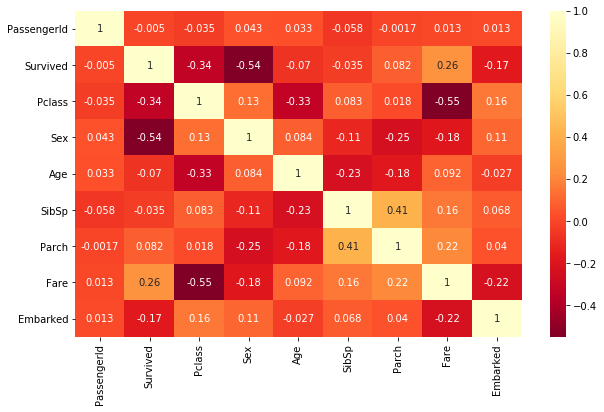

In [27]:
#Correlation
cor=new_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='YlOrRd_r',annot=True)

In [28]:
#remove outliers
from scipy.stats import zscore
z=abs(zscore(new_data))
print(new_data.shape)
new_data_final = new_data.loc[(z < 3).all(axis=1)]
print(new_data_final.shape)

(891, 9)
(820, 9)


In [29]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier()

In [30]:
X = new_data_final.iloc[:,0:-1]
Y = new_data_final.iloc[:,-1]

In [31]:
X.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0


In [32]:
Y.head()

0    2.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: Embarked, dtype: float64

In [33]:
X.shape

(820, 8)

In [34]:
Y.shape

(820,)

In [35]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier()

In [36]:
# prepare models
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ABC))

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 40,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(656, 8)
(656,)
(164, 8)
(164,)


*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.6219512195121951


Cross_Val_Score =  0.3975609756097561


r2_scr =  -0.907531259086944


classification_report
               precision    recall  f1-score   support

         0.0       0.10      0.06      0.08        32
         1.0       0.20      0.08      0.11        13
         2.0       0.72      0.83      0.77       119

    accuracy                           0.62       164
   macro avg       0.34      0.32      0.32       164
weighted avg       0.55      0.62      0.58       164



[[ 2  2 28]
 [ 1  1 11]
 [18  2 99]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score =  0.725609756097561


Cross_Val_Score =  0.7268292682926829


r2_scr =  -0.3448095376562954


classification_report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.00      0.00      0.00        13
         2.0       0.73      1.00      0.84       119

    accuracy                           0.73       164
   macro avg       0.24      0.33      0.28       164
weighted avg       0.53      0.73      0.61       164



[[  0   0  32]
 [  0   0  13]
 [  0   0 119]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.7073170731707317


Cross_Val_Score =  0.725609756097561


r2_scr =  -0.45926141320151204


classification_report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.00      0.00      0.00        13
         2.0       0.72      0.97      0.83       119

    accuracy                           0.71       164
   macro avg       0.24      0.32      0.28       164
weighted avg       0.52      0.71      0.60       164



[[  0   0  32]
 [  0   0  13]
 [  3   0 

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy_score =  0.5548780487804879


Cross_Val_Score =  0.673170731707317


r2_scr =  -1.0410584472230302


classification_report
               precision    recall  f1-score   support

         0.0       0.15      0.16      0.15        32
         1.0       0.19      0.31      0.24        13
         2.0       0.75      0.69      0.72       119

    accuracy                           0.55       164
   macro avg       0.36      0.38      0.37    

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score =  0.5365853658536586


Cross_Val_Score =  0.5487804878048781


r2_scr =  -0.6977028205873801


classification_report
               precision    recall  f1-score   support

         0.0       0.26      0.22      0.24        32
         1.0       0.22      0.85      0.34        13
         2.0       0.81      0.59      0.68       119

    accuracy                           0.54       164
   macro avg       0.43      0.55      0.42       164
weighted avg       0.66      0.54      0.57       164



[[ 7 10 15]
 [ 1 11  1]
 [19 30 70]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** RandomForestClassifier ***********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score =  0.6829268292682927


Cross_Val_Score =  0.7182926829268291


r2_scr =  -0.5546379761558593


classification_report
               precision    recall  f1-score   support

         0.0       0.25      0.16      0.19        32
         1.0       0.38      0.23      0.29        13
         2.0       0.76      0.87  

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** AdaBoostClassifier ***********************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score =  0.7195121951219512


Cross_Val_Score =  0.6914634146341463


r2_scr =  -0.3543471939517302


classification_report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.45      0.38      0.42        13
         2.0       0.75      0.95      0.84       119

    accuracy                           0.72       164
   macro avg       0.40      0.44      0.42       164
weighted avg       0.58      0.72      0.64       164



[[  0   3  29]
 [  0   5   8]
 [  3   3 113]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)





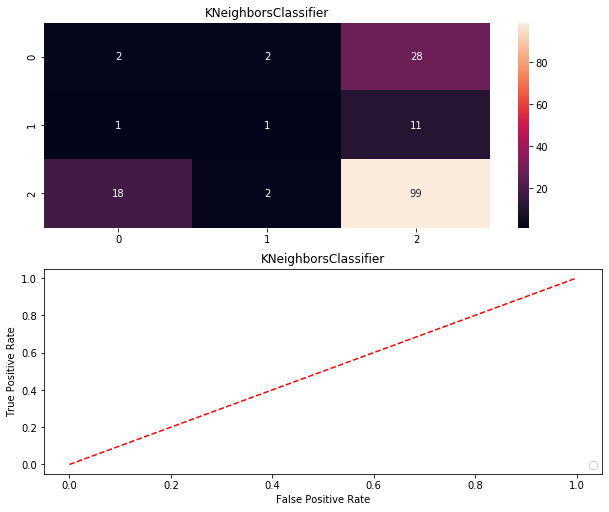

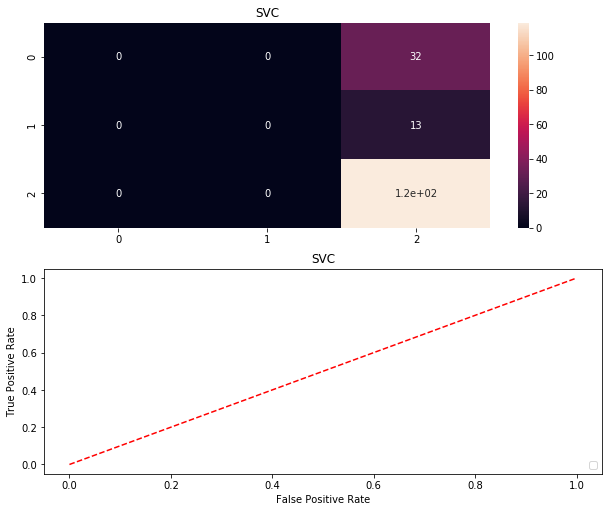

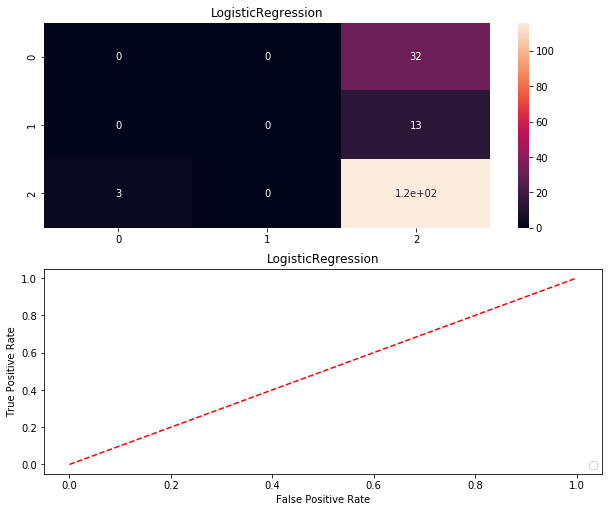

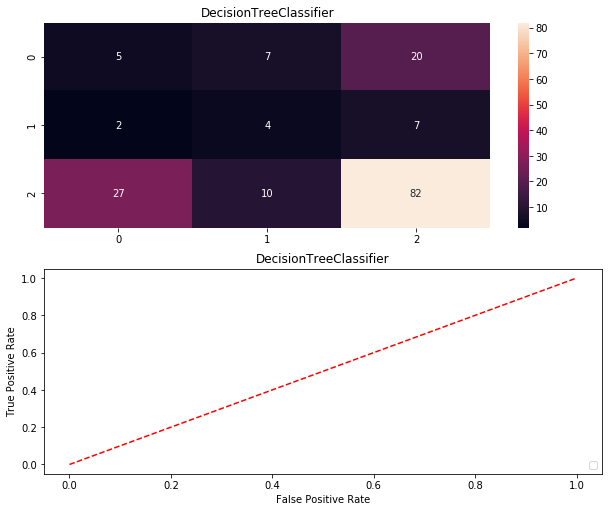

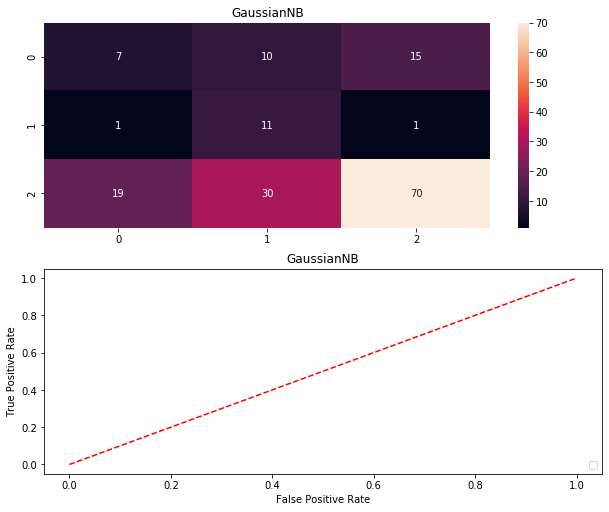

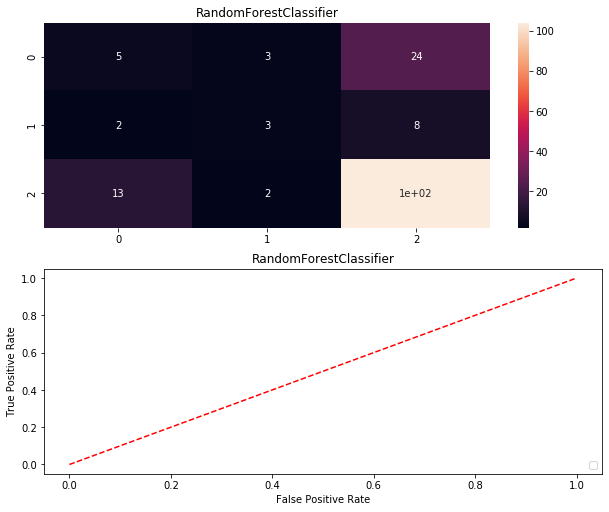

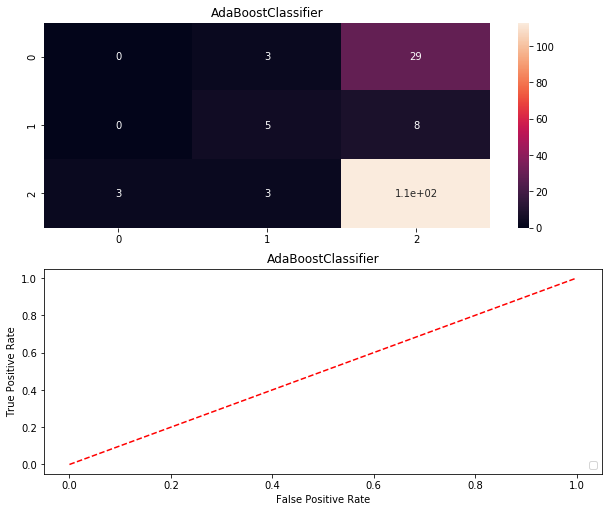

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
Model = []
score = []
cvs=[]
r2score=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    r2_scr=r2_score(y_test,pre)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('r2_scr = ',r2_scr)
    r2score.append(r2_scr)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    #plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [39]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'r2_scr' :r2score ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,r2_scr,Cross_val_score
0,KNeighborsClassifier,62.195122,-0.907531,39.756098
1,SVC,72.560976,-0.344810,72.682927
2,LogisticRegression,70.731707,-0.459261,72.560976
3,DecisionTreeClassifier,55.487805,-1.041058,67.317073
4,GaussianNB,53.658537,-0.697703,54.878049
5,RandomForestClassifier,68.292683,-0.554638,71.829268
6,AdaBoostClassifier,71.951220,-0.354347,69.146341


In [40]:
#maximum f1_score and accuracy_score in SVC as compared to other model
from sklearn.externals import joblib

#Save the model as a pickle in a file

joblib.dump(SV,'titanic_svcfile.obj')

['titanic_svcfile.obj']